In [1]:
import sys
import re
import os
from datetime import datetime
from time import sleep
from IPython.display import display, clear_output, HTML

# set working dir
WORKING_DIR = re.sub('jdi-qasp-ml.*$','',os.path.normpath(os.getcwd())) + 'jdi-qasp-ml'
os.chdir(WORKING_DIR)

import utils
from utils import *
import torch
import pandas as pd
import numpy as np
import torch
from glob import glob
import selenium
from tqdm.auto import tqdm

START_TS = datetime.now()
display(HTML(f'{START_TS} - Current working directory: <b>{WORKING_DIR}</b>'))

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import numba



2021-06-05 20:40:58,433 -INFO - config:config.py:16 - Module utils.config was loaded
2021-06-05 20:40:58,433 -INFO - common:common.py:616 - Module utils.common is loaded...
2021-06-05 20:40:58,433 -INFO - hidden:hidden.py:121 - hidden module is loaded
2021-06-05 20:40:58,445 -INFO - dataset_builder:dataset_builder.py:202 - dataset package is loaded...
2021-06-05 20:40:59,050 -INFO - dataset:dataset.py:653 - dataset module is loaded...


In [2]:
from utils import get_all_elements, iou_xywh, screenshot, maximize_window, get_parents_list, build_tree_dict, DatasetBuilder

In [3]:
selenium.__version__

'3.141.0'

# Parameters

In [4]:
SITE_URL = 'https://jdi-testing.github.io/jdi-light/'
LOGIN = 'Roman'
PASSWORD = 'Jdi1234'
SAVE_SCREEN = True
WAIT_TIME_SECONDS = 7
HEADLESS = True #False

In [5]:
with open('dataset/classes.txt', 'r') as f:
    decoder_dict = { i:s.strip() for i, s in  enumerate(f.readlines())}
    encoder_dict = { v: k for k, v in decoder_dict.items()}
decoder_dict, encoder_dict

({0: 'button',
  1: 'link',
  2: 'textfield',
  3: 'dropdown',
  4: 'checkbox',
  5: 'radiobutton',
  6: 'textarea',
  7: 'fileinput',
  8: 'iframe',
  9: 'range',
  10: 'progressbar',
  11: 'datetimeselector',
  12: 'colorpicker',
  13: 'numberselector',
  14: 'selector',
  15: 'table',
  16: 'slider-toggle',
  17: 'slider',
  18: 'tree-node',
  19: 'steper',
  20: 'tab',
  21: 'n/a'},
 {'button': 0,
  'link': 1,
  'textfield': 2,
  'dropdown': 3,
  'checkbox': 4,
  'radiobutton': 5,
  'textarea': 6,
  'fileinput': 7,
  'iframe': 8,
  'range': 9,
  'progressbar': 10,
  'datetimeselector': 11,
  'colorpicker': 12,
  'numberselector': 13,
  'selector': 14,
  'table': 15,
  'slider-toggle': 16,
  'slider': 17,
  'tree-node': 18,
  'steper': 19,
  'tab': 20,
  'n/a': 21})

# Generate dataset

2021-06-05 20:40:59,171 -INFO - dataset_builder:dataset_builder.py:77 - Dataset name: angular
2021-06-05 20:40:59,172 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-06-05 20:40:59,172 -INFO - dataset_builder:dataset_builder.py:123 - Creating driver
2021-06-05 20:41:00,252 -INFO - dataset_builder:dataset_builder.py:131 - Chrome web driver is created
2021-06-05 20:41:00,252 -INFO - <ipython-input-6-0f93ae86f6ac>:<ipython-input-6-0f93ae86f6ac>:5 - getting page
2021-06-05 20:41:20,249 -INFO - common:common.py:75 - Window maximized
2021-06-05 20:41:27,254 -INFO - dataset_builder:dataset_builder.py:134 - save scrinshot: dataset/images/angular.png
2021-06-05 20:41:29,419 -INFO - dataset_builder:dataset_builder.py:178 - Collect features using JS script
2021-06-05 20:41:34,004 -INFO - dataset_builder:dataset_builder.py:186 - Save html to dataset/html/angular.html
2021-06-05 20:41:34,065 -INFO - dataset_builder:dataset_builder.py:196 - Save parquet to

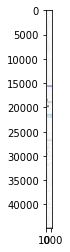

In [6]:
DATASET_NAME = 'angular'
class JDIDatasetBuilder(DatasetBuilder):

    def setUp(self, driver):
        self.logger.info(f'getting page')
        driver.get(SITE_URL)
        
        driver.find_element_by_id("user-icon").click()
        driver.find_element_by_id("name").send_keys(LOGIN)
        driver.find_element_by_id("password").send_keys(PASSWORD)
        driver.find_element_by_id("login-button").click()
        sleep(WAIT_TIME_SECONDS)
        
        driver.find_element_by_link_text("Elements packs").click()
        driver.find_element_by_link_text("Angular").click()
        sleep(WAIT_TIME_SECONDS)
        
#         driver.find_element_by_link_text("Service").click()
#         driver.find_element_by_link_text("Complex Table").click()
        maximize_window(driver=driver)
        sleep(WAIT_TIME_SECONDS)
        

with JDIDatasetBuilder(url=SITE_URL, dataset_name=DATASET_NAME, headless=True) as builder:
    elements_df = builder.dataset
    plt.imshow(plt.imread(f'dataset/images/{DATASET_NAME}.png'))



In [7]:
df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')

In [8]:
df = build_features(df)

2021-06-05 20:41:39,139 -INFO - hidden:hidden.py:107 - build field "is_hidden"


In [9]:
elements_dict = build_elements_dict(df)

In [10]:
df[['tag_name', 'element_id', 'parent_id', 'upper_sibling', 'lower_sibling', 'displayed', 'is_hidden', 'x', 'y', 'width', 'height']]

tag_name                    element_id                     parent_id  \
0        HTML  3514559070148894242525671004                          None   
1        HEAD  9159030854148894246383898303  3514559070148894242525671004   
2        META  4052927712148894241227457354  9159030854148894246383898303   
3       TITLE  6778301993148894247867370227  9159030854148894246383898303   
4        META  2929592347148894249986801725  9159030854148894246383898303   
...       ...                           ...                           ...   
6445       LI  8680145794148894326099041236  3352735585148894327655192253   
6446       LI  2516150486148894328767879289  3352735585148894327655192253   
6447        A  6256411076148894323197784505  2516150486148894328767879289   
6448   SCRIPT  0411114671148894329549798588  5934991781148894244602648653   
6449   SCRIPT  7386037427148894329686325483  5934991781148894244602648653   

                     upper_sibling                 lower_sibling  displayed  \
0                             None                          None       True   
1                             None  5934991781148894244602648653      False   
2                             None  6778301993148894247867370227      False   
3     4052927712148894241227457354  2929592347148894249986801725      False   
4     6778301993148894247867370227  8461143289148894249463528196      False   
...                            ...                           ...        ...   
6445  1859906584148894322782646023  2516150486148894328767879289       True   
6446  8680145794148894326099041236                          None       True   
6447                          None                          None       True   
6448  6037875698148894321991479501  7386037427148894329686325483      False   
6449  0411114671148894329549798588                          None      False   

      is_hidden            x         y        width   height  
0             0     0.000000      0.00  1183.000000  44785.0  
1             0     0.000000      0.00     0.000000      0.0  
2             0     0.000000      0.00     0.000000      0.0  
3             0     0.000000      0.00     0.000000      0.0  
4             0     0.000000      0.00     0.000000      0.0  
...         ...          ...       ...          ...      ...  
6445          0  1092.484375  44762.75     3.125000     14.0  
6446          0  1110.609375  44762.75    69.390625     14.0  
6447          0  1110.609375  44762.75    69.390625     14.0  
6448          1     0.000000      0.00     0.000000      0.0  
6449          1     0.000000      0.00     0.000000      0.0  

[6450 rows x 11 columns]

In [11]:
predictions_df = rule_base_predict(df)
print(predictions_df.shape)
# predictions_df

2021-06-05 20:41:41,881 -INFO - common:common.py:489 - Num radio buttons found: 31
2021-06-05 20:41:41,887 -INFO - common:common.py:493 - Num radio2 buttons found: 0
2021-06-05 20:41:41,892 -INFO - common:common.py:500 - Num checkboxes found: 0
2021-06-05 20:41:41,901 -INFO - common:common.py:507 - Num comboboxes/dropdowns found: 5
2021-06-05 20:41:41,907 -INFO - common:common.py:518 - Num textfields found: 9
2021-06-05 20:41:41,913 -INFO - common:common.py:523 - Num texfields for numbers found: 17
2021-06-05 20:41:41,918 -INFO - common:common.py:528 - Num ranges found: 0
2021-06-05 20:41:41,923 -INFO - common:common.py:533 - Num ordinary text inputs found: 0
2021-06-05 20:41:41,926 -INFO - common:common.py:536 - Num buttons found: 173
2021-06-05 20:41:41,931 -INFO - common:common.py:541 - Num buttons1 found: 1
2021-06-05 20:41:41,937 -INFO - common:common.py:546 - Num buttons2 (Material-UI) found: 0
2021-06-05 20:41:41,940 -INFO - common:common.py:551 - Num links found: 238
(343, 8)


# **Enrich predictions**

In [12]:
radio_df = df[(df.tag_name == 'MAT-RADIO-BUTTON') &
              df.displayed & (df.is_hidden == 0) & (df.width > 0.0) & (df.height>0.0)
             ].copy()
radio_df['label'] = encoder_dict['radiobutton']
radio_df = radio_df[predictions_df.columns]
radio_df

element_id           x           y       width  \
342   2734200636148894257401163826  230.000000    265.0000   76.609375   
352   3706734599148894259399282260  322.609375    265.0000   76.609375   
367   9507357240148894259403686820  235.000000    460.0000  930.000000   
377   1045209128148894256883965751  235.000000    495.0000  930.000000   
387   3857985557148894251570295801  235.000000    530.0000  930.000000   
397   0648518890148894254064467772  235.000000    565.0000  930.000000   
464   6380497382148894255785660666  307.234375   1054.5000   53.828125   
474   6437420843148894252744362557  381.062500   1054.5000   64.953125   
541   3532291496148894250033483858  310.203125   1657.5000   72.625000   
551   9671321258148894253000357887  402.828125   1657.5000   66.046875   
561   4235105323148894250307474920  488.875000   1657.5000   57.281250   
2101  4820662175148894277924304724  304.093750  13073.8125   54.359375   
2111  9049010855148894270462404496  382.453125  13073.8125   66.781250   
2604  1030681441148894273870650828  261.000000  17381.8750   54.406250   
2614  4772797708148894273590189284  331.406250  17381.8750   52.890625   
2624  5503162835148894279213375739  400.296875  17381.8750   56.156250   
4385  6366857198148894304780022463  310.203125  30931.1250   72.625000   
4395  1558105428148894300348922022  402.828125  30931.1250   66.046875   
4405  2695814382148894302041226568  488.875000  30931.1250   57.281250   
4418  3459667468148894309996337910  310.828125  30991.1250   98.218750   
4428  5184753844148894301335857404  429.046875  30991.1250  108.187500   
4531  2811437181148894301883510823  310.203125  32071.1250   72.625000   
4541  2793764760148894309483502536  402.828125  32071.1250   66.046875   
4551  7094281118148894302438095952  488.875000  32071.1250   57.281250   
4564  6097223716148894309816254276  310.828125  32131.1250   98.218750   
4574  8451963185148894300266710869  429.046875  32131.1250  108.187500   
4584  0761327791148894306457610557  557.234375  32131.1250   61.984375   
4594  6207560894148894307003493321  639.218750  32131.1250   62.343750   

      height  displayed  is_hidden  label  
342     25.0       True          0      5  
352     25.0       True          0      5  
367     25.0       True          0      5  
377     25.0       True          0      5  
387     25.0       True          0      5  
397     25.0       True          0      5  
464     25.0       True          0      5  
474     25.0       True          0      5  
541     25.0       True          0      5  
551     25.0       True          0      5  
561     25.0       True          0      5  
2101    25.0       True          0      5  
2111    25.0       True          0      5  
2604    25.0       True          0      5  
2614    25.0       True          0      5  
2624    25.0       True          0      5  
4385    25.0       True          0      5  
4395    25.0       True          0      5  
4405    25.0       True          0      5  
4418    25.0       True          0      5  
4428    25.0       True          0      5  
4531    25.0       True          0      5  
4541    25.0       True          0      5  
4551    25.0       True          0      5  
4564    25.0       True          0      5  
4574    25.0       True          0      5  
4584    25.0       True          0      5  
4594    25.0       True          0      5

In [13]:
checkbox_df = df[(df.tag_name == 'MAT-CHECKBOX') &
              df.displayed & (df.is_hidden == 0) 
             ].copy()
checkbox_df['label'] = encoder_dict['checkbox']
checkbox_df = checkbox_df[predictions_df.columns]
checkbox_df

element_id           x             y       width  \
415   9969036723148894259917044476  230.000000    806.125000   83.390625   
435   2481548742148894257773780254  256.000000    992.500000   73.046875   
448   7446296391148894254095429762  349.046875    992.500000  104.187500   
485   4453754908148894253843543234  256.000000   1112.500000   73.500000   
502   1214118337148894254585075437  256.000000   1233.500000  108.109375   
572   4989019645148894255683190096  256.000000   1715.500000   73.046875   
586   4025672714148894256031238364  256.000000   1775.500000   73.500000   
891   9542709063148894255590345846  230.000000   4642.750000  101.703125   
1539  4423673241148894269813164458  254.000000   9364.250000   84.593750   
1553  0232232542148894264937022854  254.000000   9424.250000  127.359375   
1567  1587442051148894266526027098  254.000000   9484.250000   65.812500   
1580  6977821836148894260033707455  335.812500   9484.250000   70.687500   
1594  8747468296148894262287011525  254.000000   9544.250000   73.500000   
2085  1903046251148894265330318452  230.000000  13044.937500  144.312500   
2524  1926158113148894276611814722  246.000000  16850.000000  113.968750   
2692  9875487974148894272028451905  430.000000  18338.000000   53.796875   
3359  0199574899148894298448738549  270.000000  23715.500000   77.156250   
3383  6827104128148894299664868104  270.000000  23763.500000   84.750000   
3782  1346296790148894297290529966  355.843750  26029.375000  150.625000   
4636  1596702166148894306576558678  230.000000  32570.437500   75.765625   
4649  9775144535148894300833063401  317.765625  32570.437500   73.500000   
4662  1260862844148894306141686135  403.265625  32570.437500   92.250000   
4880  8430943813148894303199924061  346.281250  34805.375000  115.437500   
5965  0580968210148894315578209167  254.000000  42153.359375   16.000000   
5985  8569962681148894310918294020  254.000000  42204.875000   16.000000   
6004  9144603200148894315126772374  254.000000  42252.875000   16.000000   
6023  1649508495148894319283777637  254.000000  42300.875000   16.000000   
6042  5478973890148894313409607470  254.000000  42348.875000   16.000000   
6061  3852756382148894312780730701  254.000000  42396.875000   16.000000   

      height  displayed  is_hidden  label  
415     16.0       True          0      4  
435     29.0       True          0      4  
448     29.0       True          0      4  
485     29.0       True          0      4  
502     29.0       True          0      4  
572     29.0       True          0      4  
586     29.0       True          0      4  
891     16.0       True          0      4  
1539    29.0       True          0      4  
1553    29.0       True          0      4  
1567    29.0       True          0      4  
1580    29.0       True          0      4  
1594    29.0       True          0      4  
2085    16.0       True          0      4  
2524    16.0       True          0      4  
2692    16.0       True          0      4  
3359    29.0       True          0      4  
3383    29.0       True          0      4  
3782    16.0       True          0      4  
4636    16.0       True          0      4  
4649    16.0       True          0      4  
4662    16.0       True          0      4  
4880    16.0       True          0      4  
5965    14.0       True          0      4  
5985    16.0       True          0      4  
6004    16.0       True          0      4  
6023    16.0       True          0      4  
6042    16.0       True          0      4  
6061    16.0       True          0      4

In [14]:
slider_toggle_df = df[(df.tag_name == 'MAT-SLIDE-TOGGLE') & df.displayed & (df.is_hidden == 0) 
             ].copy()
slider_toggle_df['label'] = encoder_dict['slider-toggle']
slider_toggle_df = slider_toggle_df[predictions_df.columns]
slider_toggle_df

element_id      x         y       width  height  \
522  8225843262148894256520838448  230.0  1469.000  102.359375    24.0   
603  3292235980148894251567677423  256.0  1899.000  102.359375    24.0   
632  7672617875148894252440140421  230.0  2202.125  133.515625    24.0   

     displayed  is_hidden  label  
522       True          0     16  
603       True          0     16  
632       True          0     16

In [15]:
selector_df = df[df.tag_name.isin(['MAT-SELECT', 'SELECT']) & df.displayed & (df.is_hidden == 0)].copy()
selector_df['label'] = encoder_dict['selector']
selector_df = selector_df[predictions_df.columns]
selector_df

element_id           x           y  width  height  \
740   9943692462148894256637320779  240.500000   3441.5625  180.0    15.0   
759   0169262376148894256382394477  240.500000   3536.6875  180.0    29.0   
781   8064945963148894259398078312  240.500000   3747.8125  180.0    15.0   
807   3277811084148894251497930463  240.500000   3989.9375  180.0    15.0   
827   8653414781148894255549801922  240.500000   4101.0625  180.0    29.0   
850   7776949258148894256929595861  240.500000   4357.1875  180.0    15.0   
871   6620912688148894259128862675  240.500000   4452.3125  180.0    29.0   
909   5747560336148894255823318278  240.500000   4731.4375  180.0    15.0   
928   3631651898148894250743984277  240.500000   4826.5625  180.0    29.0   
951   7034363329148894259283693147  240.500000   5066.6875  180.0    15.0   
970   7138930253148894255980741739  240.500000   5161.8125  180.0    29.0   
993   1236790690148894253246014335  240.500000   5401.9375  180.0    15.0   
1012  7679740392148894250515380332  240.500000   5497.0625  180.0    29.0   
1035  8269112628148894259565057923  240.500000   5708.1875  180.0    15.0   
1057  4416021585148894256262712551  240.500000   5905.3125  180.0    15.0   
1079  1886076949148894259164272522  240.500000   6102.4375  180.0    15.0   
1101  1916178337148894251460164292  240.500000   6299.5625  180.0    15.0   
1125  0614666361148894251851055402  240.500000   6525.6875  180.0    15.0   
1146  1303139526148894257079115715  240.500000   6620.8125  180.0    29.0   
1217  8079038570148894269241542750  240.500000   7365.0000  180.0    15.0   
2051  6181757666148894265213429800  240.500000  12783.3750  180.0    15.0   
2149  4286256006148894272419926880  696.500000  13134.7500  199.0    15.0   
2269  1446991278148894270371502179  449.500000  13767.8125  180.0    15.0   
2353  6024352562148894279568674521  242.000000  14363.2500  180.0    18.0   
4810  1126639860148894302483192983  240.500000  34255.9375  180.0    15.0   
4950  9506807202148894304012479188  240.500000  35559.3125  180.0    15.0   
5023  0016307209148894302366074284  888.937500  36076.8750   46.0    13.0   
5788  3940885502148894312340694159  895.609375  41054.3750   46.0    13.0   
5863  6234783289148894314344586932  822.281250  41544.6250   46.0    13.0   

      displayed  is_hidden  label  
740        True          0     14  
759        True          0     14  
781        True          0     14  
807        True          0     14  
827        True          0     14  
850        True          0     14  
871        True          0     14  
909        True          0     14  
928        True          0     14  
951        True          0     14  
970        True          0     14  
993        True          0     14  
1012       True          0     14  
1035       True          0     14  
1057       True          0     14  
1079       True          0     14  
1101       True          0     14  
1125       True          0     14  
1146       True          0     14  
1217       True          0     14  
2051       True          0     14  
2149       True          0     14  
2269       True          0     14  
2353       True          0     14  
4810       True          0     14  
4950       True          0     14  
5023       True          0     14  
5788       True          0     14  
5863       True          0     14

In [16]:
text_df = df[(df.tag_name == 'INPUT') &
             (df.attributes.apply(lambda x: 'mat-input-element' in str(x.get('class')))) &
             df.displayed & 
             (df.is_hidden == 0)].copy()
text_df['label'] = encoder_dict['textfield']
text_df = text_df[predictions_df.columns]
text_df

element_id      x           y  width  height  \
623   2035336941148894257638190722  240.5   2157.8125  479.0    15.0   
651   5460304447148894257188138426  240.5   2378.9375  479.0    15.0   
668   3253462142148894251752196961  240.5   2576.0625  479.0    15.0   
687   5227478695148894259721225477  240.5   2773.1875  479.0    15.0   
704   6490263518148894253829830596  240.5   2970.3125  180.0    15.0   
...                            ...    ...         ...    ...     ...   
4979  6186040033148894301563843301  240.5  36004.4375  180.0    15.0   
4992  9428502714148894307202861586  453.5  36004.4375  180.0    15.0   
5005  5222404545148894308228697829  666.5  36004.4375  180.0    15.0   
5393  4123210512148894310308264810  240.5  38563.8125  919.0    15.0   
5713  9387254149148894319681550755  240.5  40780.9375  919.0    15.0   

      displayed  is_hidden  label  
623        True          0      2  
651        True          0      2  
668        True          0      2  
687        True          0      2  
704        True          0      2  
...         ...        ...    ...  
4979       True          0      2  
4992       True          0      2  
5005       True          0      2  
5393       True          0      2  
5713       True          0      2  

[71 rows x 8 columns]

In [17]:
textarea_df = df[(df.tag_name == 'TEXTAREA') &
             df.displayed & 
             (df.is_hidden == 0)].copy()
textarea_df['label'] = encoder_dict['textarea']
textarea_df = textarea_df[predictions_df.columns]
textarea_df

element_id      x           y  width  height  \
1182  0647907520148894252628872535  240.5   6948.0625  479.0    34.0   
1236  6573378324148894262871663372  455.0   7365.0000  180.0    18.0   
1336  0715680971148894262130944177  240.5   8100.0625  479.0    34.0   
1349  6317753704148894268887401801  240.5   8185.1875  479.0    34.0   
2070  9864948771148894265176533757  240.5  12851.5000  180.0    34.0   

      displayed  is_hidden  label  
1182       True          0      6  
1236       True          0      6  
1336       True          0      6  
1349       True          0      6  
2070       True          0      6

In [18]:
tree_df = df[(df.tag_name == 'MAT-TREE-NODE') &
             df.displayed & 
             (df.is_hidden == 0)].copy()
tree_df['label'] = encoder_dict['tree-node']
tree_df = tree_df[predictions_df.columns]
tree_df

element_id      x        y  width  height  displayed  \
3320  1490672216148894294681210056  230.0  23260.0  940.0    48.0       True   
3326  6661550714148894293617415310  230.0  23308.0  940.0    48.0       True   
3337  9432970312148894293138688216  230.0  23483.0  940.0    48.0       True   
3343  8737882590148894293917305487  230.0  23531.0  940.0    48.0       True   
3353  9580148363148894294753886342  230.0  23706.0  940.0    48.0       True   
3377  4273036807148894297496507415  230.0  23754.0  940.0    48.0       True   
3488  3225097113148894294137200422  230.0  24152.0  940.0    48.0       True   
3494  9440402703148894290041201392  230.0  24200.0  940.0    48.0       True   

      is_hidden  label  
3320          0     18  
3326          0     18  
3337          0     18  
3343          0     18  
3353          0     18  
3377          0     18  
3488          0     18  
3494          0     18

# Put everything together

In [19]:
print(predictions_df.shape, radio_df.shape, checkbox_df.shape, selector_df.shape, text_df.shape, textarea_df.shape, tree_df.shape)
predictions_df = pd.concat([predictions_df, radio_df, checkbox_df, slider_toggle_df, selector_df, text_df, textarea_df, tree_df])

(343, 8) (28, 8) (29, 8) (29, 8) (71, 8) (5, 8) (8, 8)


1200 44802


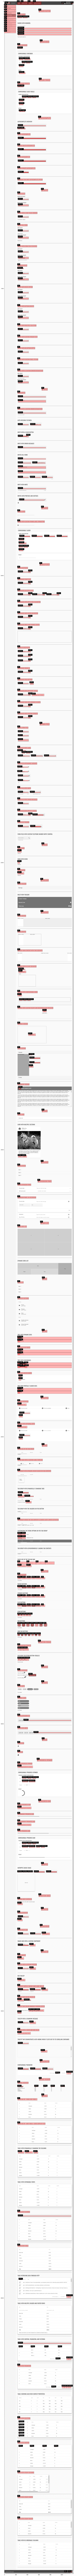

In [20]:
# img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
# img_height, img_width = img.shape
# print(img_width, img_height)
# plt.figure(figsize=(15, 500))
# plt.imshow(img, cmap='gray')
# axes = plt.gca()

# for _, r in predictions_df.iterrows():
    
#     patch = patches.Rectangle((r.x, r.y), r.width, r.height, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
#     axes.add_patch(patch)
#     plt.text(r.x, r.y, 
#              decoder_dict[r.label] + ':',  ## + r.element_id, 
#              fontsize = 10, 
#              color = 'white', 
#              backgroundcolor='black',
#              alpha=1.)
    

# Generate and Save Labels

In [21]:
# labels = build_to_yolo(df = predictions_df, img_width=img_width, img_heght=img_height)
# labels

In [22]:
# labeled_df = pd.DataFrame(labels, columns=['label', 'x', 'y', 'width', 'height'])
# labeled_df.label = labeled_df.label.astype(int)
# display(labeled_df)
# labeled_df.to_csv(f'dataset/annotations/{DATASET_NAME}.txt', header=False, sep=' ', index=False)

# Preview Labels

In [23]:
boxes_df = pd.read_csv(f'dataset/annotations/{DATASET_NAME}.txt', sep=' ', names = ['label', 'x', 'y', 'width', 'height'])
boxes_df
boxes_df['box'] = boxes_df.apply(lambda r: from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height), axis=1)
boxes_df.head()

label       x         y  width    height                   box
0      3  0.3975  0.053212   0.40  0.000357  (237, 2376, 480, 15)
1      3  0.3975  0.057665   0.40  0.000335  (237, 2576, 480, 15)
2      3  0.3975  0.062051   0.40  0.000357  (237, 2772, 480, 15)
3      3  0.2750  0.066448   0.15  0.000357  (240, 2969, 180, 15)
4      3  0.3975  0.070834   0.40  0.000335  (237, 3166, 480, 15)

In [24]:
# img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
# img_height, img_width = img.shape
# print(img_width, img_height)
# plt.figure(figsize=(15, 500))
# plt.imshow(img, cmap='gray')
# axes = plt.gca()

# for i, r in boxes_df.iterrows():
#     x, y, w, h = from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height)    
#     patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
#     axes.add_patch(patch)
#     plt.text(x, y, 
#              f'({i})' + decoder_dict[r.label] + ':',  ## + r.element_id, 
#              fontsize = 10, 
#              color = 'white', 
#              backgroundcolor='black',
#              alpha=1.)
    

In [25]:
# df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')
df.columns

Index(['attributes', 'displayed', 'element_id', 'height', 'onmouseenter',
       'onmouseover', 'parent_id', 'style', 'tag_name', 'text', 'width', 'x',
       'y', 'is_hidden', 'upper_sibling', 'lower_sibling', 'siblings'],
      dtype='object')

In [26]:
columns_to_drop = set(df.columns).intersection(set(['label', 'annotation_line_no', 'iou', 'tag', 'label_text']))
if len(columns_to_drop) >= 0:
    df.drop(columns=columns_to_drop, inplace=True)

In [27]:
df = assign_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=img_width, img_height=img_height)

2021-06-05 20:41:51,368 -INFO - labels:labels.py:38 - Assign labels from annotation file: dataset/annotations/angular.txt
2021-06-05 20:41:51,369 -INFO - labels:labels.py:40 - Getting image size
2021-06-05 20:41:51,369 -INFO - labels:labels.py:42 - Image size (w,h): (1200, 44802)
2021-06-05 20:41:51,370 -INFO - labels:labels.py:47 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-05 20:41:51,370 -INFO - labels:labels.py:55 - getting "n/a" class code
2021-06-05 20:41:51,370 -INFO - labels:labels.py:62 - "n/a" class code: 21
2021-06-05 20:41:51,376 -INFO - labels:labels.py:72 - 557 annotation has been read


Assign labels:   0%|          | 0/557 [00:00<?, ?it/s]

2021-06-05 20:47:23,207 -INFO - labels:labels.py:121 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-05 20:47:23,207 -INFO - labels:labels.py:124 - 557 labels have been assigned


In [28]:
df.columns

Index(['attributes', 'displayed', 'element_id', 'height', 'onmouseenter',
       'onmouseover', 'parent_id', 'style', 'tag_name', 'text', 'width', 'x',
       'y', 'is_hidden', 'upper_sibling', 'lower_sibling', 'siblings', 'idx',
       'label', 'annotation_line_no', 'iou', 'tag', 'label_text'],
      dtype='object')

In [29]:
df.label.value_counts()

21    5898
1      168
0      146
2       71
4       29
5       28
14      28
20      26
15      17
11      15
19       7
17       5
6        5
3        5
10       4
16       3
Name: label, dtype: int64

1200 44802


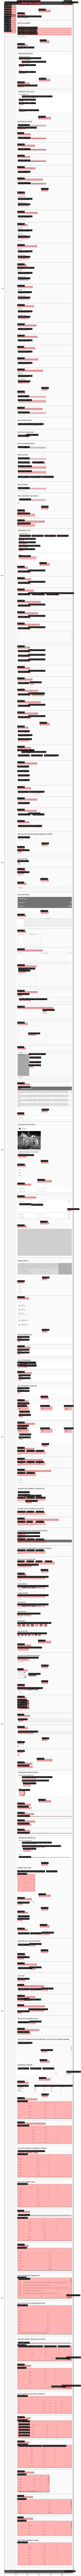

In [30]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 500))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in df[df.label_text != 'n/a'].iterrows():
    x, y, w, h = r.x, r.y, r.width, r.height  
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    
    # print(r.tag_name, r.label_text, (x,y,w,h), r.element_id)
    
    axes.add_patch(patch)
    plt.text(x, y, 
             decoder_dict[r.label] + ':' + r.tag_name + ': ' +str(round(r.iou, 4)), # + ':' + str((x, y, w, h)),  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
